<a href="https://colab.research.google.com/github/sejalshitole/Projects/blob/main/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CodeClause**

AUTHOR : SEJAL SHITOLE

PROJECT 2: Market Basket Analysis in Python using Apriori Algorithm

In [1]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=ec3450ace48acc2fde11c08ac0156ed106f531c406322111a74fbd5d16abf223
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from apyori import apriori

In [6]:
df = pd.read_csv("/Market_Basket_Optimisation.csv", header=None)
display(df.head())

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
print(df.shape)

(7501, 20)


In [8]:
records = []
for i in range(1, 7501):
    records.append([str(df.values[i, j]) for j in range(0, 20)])

In [9]:
print(type(records))


<class 'list'>


In [10]:
association_rules = apriori(records, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
association_results = list(association_rules)

In [11]:
print("There are {} Relations derived.".format(len(association_results)))

There are 48 Relations derived.


In [12]:
for i in range(0, len(association_results)):
    print(association_results[i][0])

frozenset({'chicken', 'light cream'})
frozenset({'escalope', 'mushroom cream sauce'})
frozenset({'escalope', 'pasta'})
frozenset({'ground beef', 'herb & pepper'})
frozenset({'tomato sauce', 'ground beef'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'pasta', 'shrimp'})
frozenset({'chicken', 'nan', 'light cream'})
frozenset({'chocolate', 'shrimp', 'frozen vegetables'})
frozenset({'cooking oil', 'spaghetti', 'ground beef'})
frozenset({'nan', 'escalope', 'mushroom cream sauce'})
frozenset({'nan', 'escalope', 'pasta'})
frozenset({'ground beef', 'spaghetti', 'frozen vegetables'})
frozenset({'olive oil', 'milk', 'frozen vegetables'})
frozenset({'shrimp', 'mineral water', 'frozen vegetables'})
frozenset({'olive oil', 'spaghetti', 'frozen vegetables'})
frozenset({'shrimp', 'spaghetti', 'frozen vegetables'})
frozenset({'spaghetti', 'tomatoes', 'frozen vegetables'})
frozenset({'grated cheese', 'spaghetti', 'ground beef'})
frozenset({'ground beef', 'herb & pepper', 'mineral water'})


In [13]:
for item in association_results:

    pair = item[0]
    items = [x for x in pair]
    print("Rule: " + items[0] + " -> " + items[1])

    print("Support: " + str(item[1]))

    print("Confidence: " + str(item[2][0][2]))
    print("Lift: " + str(item[2][0][3]))
    print("=====================================")

Rule: chicken -> light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: escalope -> mushroom cream sauce
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
Rule: escalope -> pasta
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
Rule: ground beef -> herb & pepper
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
Rule: tomato sauce -> ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
Rule: olive oil -> whole wheat pasta
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.130221288078346
Rule: pasta -> shrimp
Support: 0.005066666666666666
Confidence: 0.3220338983050848
Lift: 4.514493901473151
Rule: chicken -> nan
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
Rule: chocolate -> shrimp
Support: 0.005333333333333333
Confidence: 0.23255813953488372
Lift: 3.26016083

In [14]:
import networkx as nx
df['food'] = 'Food'
food = df.truncate(before = -1, after = 15)
food = nx.from_pandas_edgelist(food, source = 'food', target = 0, edge_attr = True)

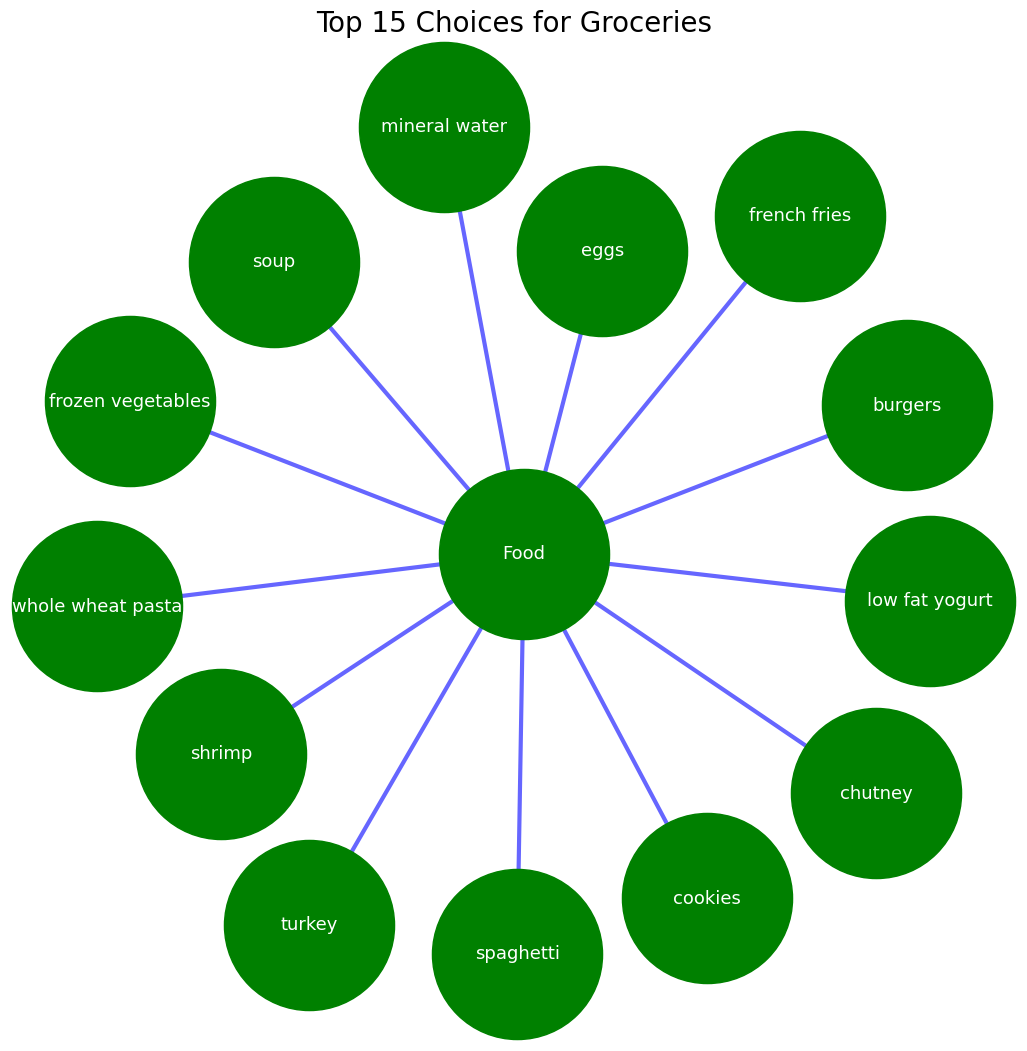

In [15]:
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (13, 13)
pos = nx.spring_layout(food)
color = plt.cm.Set1(np.linspace(0, 15, 1))
nx.draw_networkx_nodes(food, pos, node_size = 15000, node_color = 'GREEN')
nx.draw_networkx_edges(food, pos, width = 3, alpha = 0.6, edge_color = 'BLUE')
nx.draw_networkx_labels(food, pos, font_size = 13, font_family = 'Times New Roman', font_color='WHITE')
plt.axis('off')
plt.grid()
plt.title('Top 15 Choices for Groceries', fontsize = 20)
plt.show()